In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.defaultaction = "ignore"

In [5]:
url = "https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv"
frame = pd.read_csv(url, sep = ";")

In [6]:
frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
frame.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [8]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
frame.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


####  here we are drawing the relationship between the age and the propensity of buying the loan

In [14]:
frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


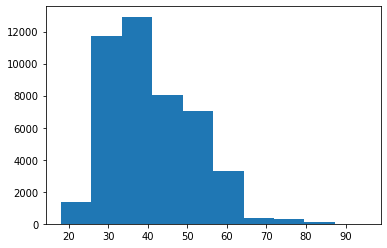

In [16]:
plt.hist(frame["age"])
plt.show()

In [18]:
print (frame.age.mean())
frame.age.isnull().sum()

40.93621021432837


0

In [19]:
frame.rename(columns={"y":"term_depo"}, inplace = True)

In [21]:
frame.head()
#  we have to find the relationship between the age and term_depo

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_depo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [28]:
frame.term_depo = frame.term_depo.apply(lambda x: 1 if x == "yes" else 0)

In [29]:
frame.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,term_depo
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [30]:
term_depo_true = frame.term_depo == 1

In [41]:
frame.groupby("age")["term_depo"].mean().head()

age
18    0.583333
19    0.314286
20    0.300000
21    0.278481
22    0.310078
Name: term_depo, dtype: float64

In [51]:
temp = frame.age[term_depo_true]
a= pd.DataFrame(temp)

In [56]:
a["depo_status"] = frame.term_depo[frame.term_depo ==1]

In [57]:
a.head()

,age,depo_status
83,59,1
86,56,1
87,41,1
129,55,1
168,54,1


(array([ 320., 1462., 1295.,  726.,  648.,  497.,  148.,  138.,   48.,
           7.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

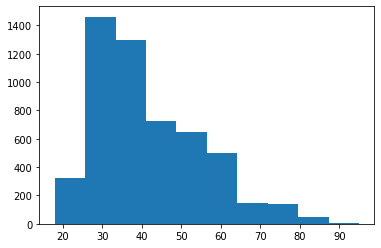

In [86]:
a.shape
plt.hist(a.age)

 ##### From the above histograme we can clearly see that the arge betwen the 25 ==> 45 tends more to take the term deposites then that of the elder once 

In [96]:
print("hello world")

hello world


##### Each factor is affecting the several factors of the target variable. Then we have to choose the driver features by the intuiation of ours 

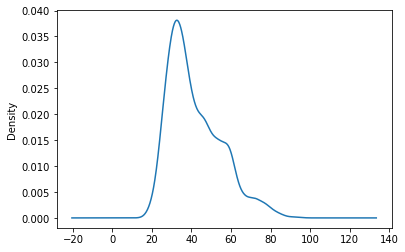

In [99]:
# The density plot shows the amount of distribution of the points over the area of networks
a['age'].plot(kind = 'density',subplots = False,layout = (1,1))